In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Carregando dados

In [110]:
data = pd.read_csv('artigos_22072019.csv',sep='|')
data.drop(["autores_cnpq", "autores", "revista", "natureza"], axis=1, inplace=True)
data.drop(data.loc[data['idioma']=='Português'].index, inplace=True)
data.drop("idioma", axis=1, inplace=True)
data.dropna(inplace=True)

### Removendo Dados Inconsistentes

In [111]:
data.drop(data.loc[(data['ano']=='rint') | (data['ano']=='onic')].index, inplace=True)
data.dtypes
filteredColumns = data.dtypes[data.dtypes == np.object]
filteredColumns
#data[['titulo', 'ano']]

titulo    object
ano       object
dtype: object

Text(0.5, 1.0, 'Proporção dos artigos')

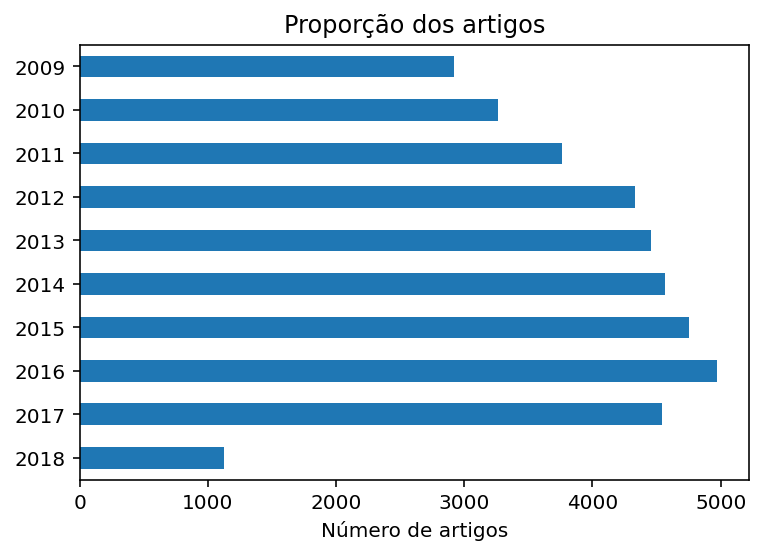

In [112]:
ano_artigos = data['ano'].value_counts().sort_index(ascending=False)
plt_colors = 'rgb'
ano_artigos.head(10).plot.barh()
plt.xlabel('Número de artigos')
plt.title('Proporção dos artigos')

# Remover pontuação

In [113]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

data['pptitulo'] = data['titulo'].apply(remove_punctuation)
#data[['titulo', 'pptitulo']]

# Remover stopwords

In [114]:
sw = stopwords.words('english')
print(len(sw))
print(sw)

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

data['pptitulo'] = data['pptitulo'].apply(stopwords)
#data[['titulo', 'pptitulo']]

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

# Top words

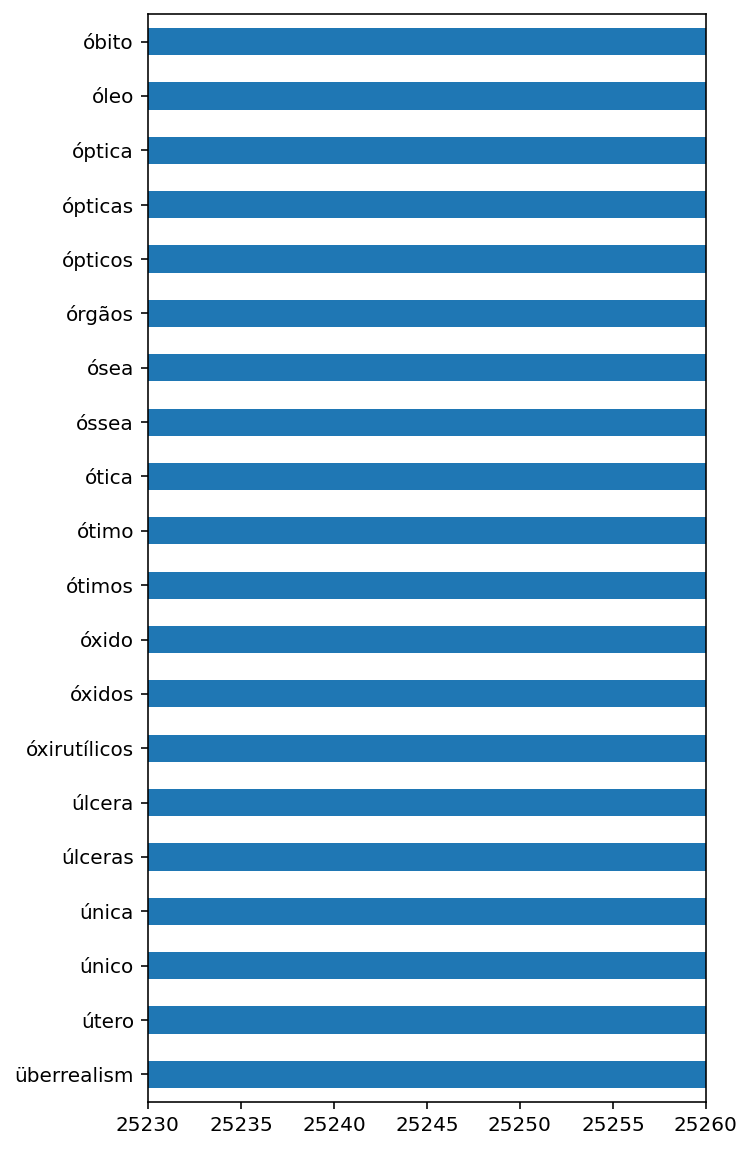

In [115]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['pptitulo'])
dictionary = count_vectorizer.vocabulary_.items()

vocab = []
count = []

for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

# Stemming

In [116]:
stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

data['pptitulo'] = data['pptitulo'].apply(stemming)
data[['titulo', 'pptitulo']]

,titulo,pptitulo
1,Isolating Complex Polynomial Roots: An algebra...,isol complex polynomi root algebra algorithm u...
2,An algebraic algorithm to Isolate Complex poly...,algebra algorithm isol complex polynomi zero u...
4,Using Computer Algebra and Chebyshev Polynomia...,use comput algebra chebyshev polynomi count po...
9,Reviewing the SacarWeb design based in discoun...,review sacarweb design base discount usabl engin
11,Extended Immersive Learning Environment: A Hyb...,extend immers learn environ hybrid remotevirtu...
...,...,...
106121,Lyn Thomas 1946-2016,lyn thoma 19462016
106122,A Voting Approach Applied to Preventive Mainte...,vote approach appli prevent mainten manag wate...
106123,Preference modeling experiments with surrogate...,prefer model experi surrog weight procedur pro...
106124,A fuzzy hybrid integrated framework for portfo...,fuzzi hybrid integr framework portfolio optim ...


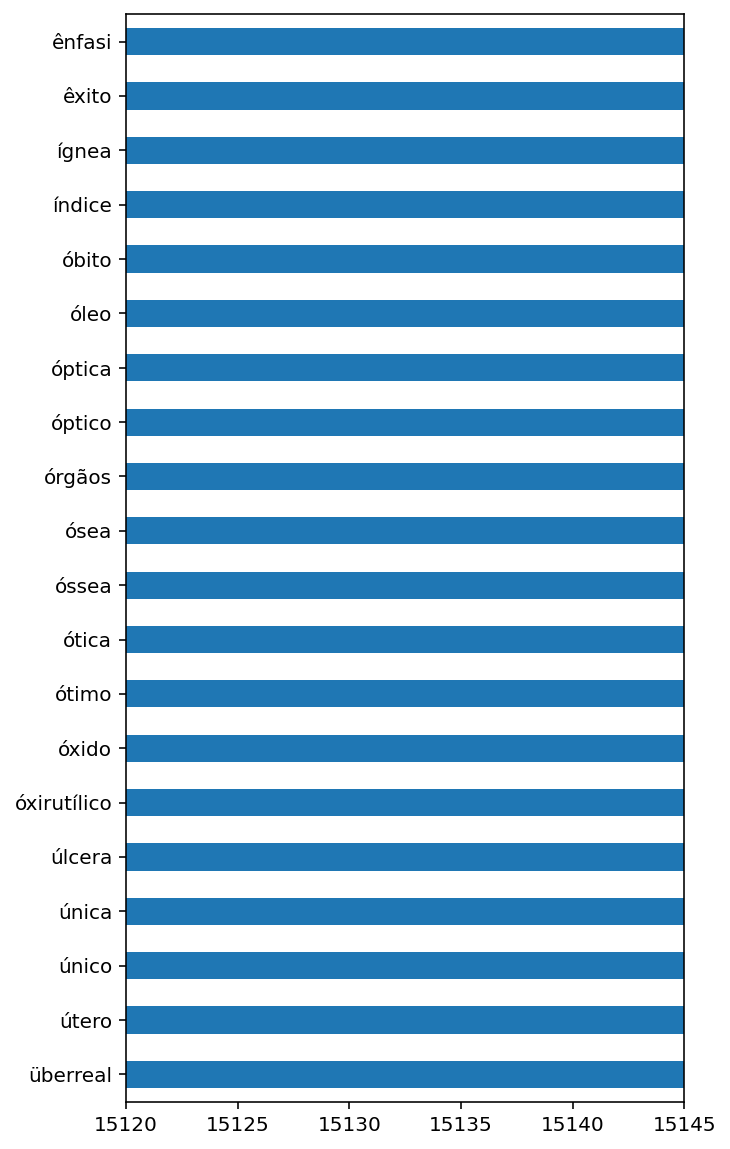

In [117]:
tfid_vectorizer = TfidfVectorizer("english")
tfid_vectorizer.fit(data['pptitulo'])
dictionary = tfid_vectorizer.vocabulary_.items()

vocab = []
count = []

for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [118]:
tfid_matrix = tfid_vectorizer.transform(data['pptitulo'])
array = tfid_matrix.todense()

In [119]:
array

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])